# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### 1.1 Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels in the dataset.
df_signs = pd.read_csv("./signnames.csv")
n_classes = len(df_signs.SignName.unique())
n_color_channels = image_shape[-1]


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of color channels =", n_color_channels)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of color channels = 3


### 1.2 Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### 1.2.1 Visualizing the different traffic signs 

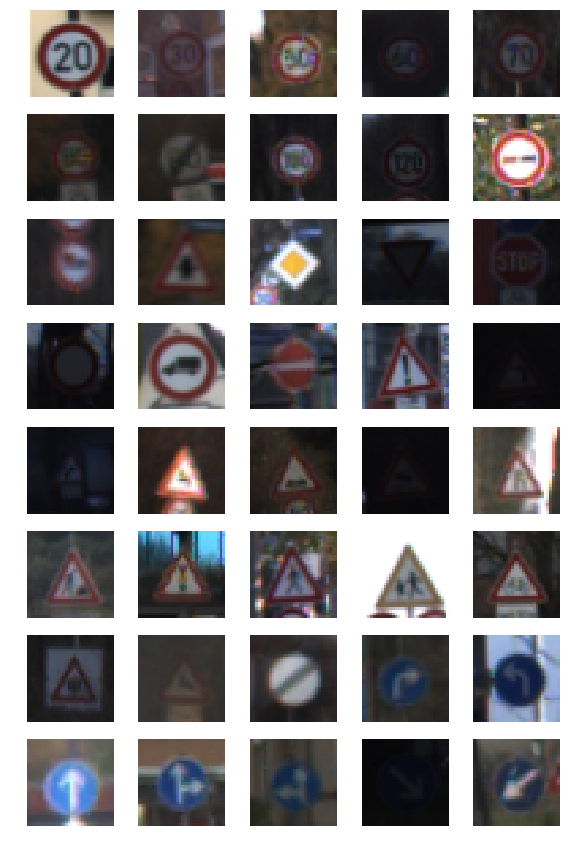

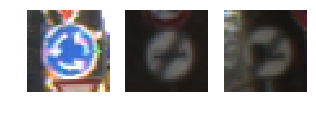

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random 
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualizing one of each traffic sign in the training set 
unique_sign_indeces = []
for i in range(n_classes):
    for j in range(len(y_train)): 
        if y_train[j] == i: 
            unique_sign_indeces.append(j)
            break
            

# Display 40 unique traffic signs 
fig, ax = plt.subplots(8,5, figsize=(10, 15))
fig.subplots_adjust(hspace = .2, wspace=.00)
ax = ax.ravel()
for i in range(n_classes-3):                 
    image = X_train[unique_sign_indeces[i]]
    ax[i].axis('off')
    ax[i].imshow(image)
    if i < 10:  
        cv2.imwrite('./data-summary/traffic-sign0{}.png'.format(i+1), image)
    else: 
        cv2.imwrite('./data-summary/traffic-sign{}.png'.format(i+1), image)

# Display 3 unique traffic signs - that did not fit into the grid     
fig2, ax2 = plt.subplots(1,3, figsize=(5, 2))
fig2.subplots_adjust(hspace = .2, wspace=.20)
ax2 = ax2.ravel()
for i in range(3):
    image = X_train[unique_sign_indeces[i+40]]
    ax2[i].axis('off')
    ax2[i].imshow(image)
    cv2.imwrite('./data-summary/traffic-sign{}.png'.format(i+41), image)

    


#### 1.2.2 Frequency of traffic signs in data set

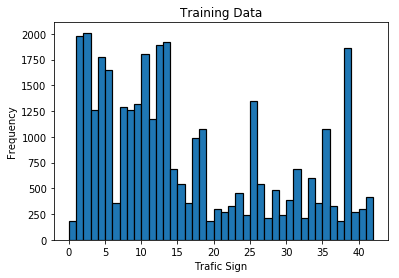

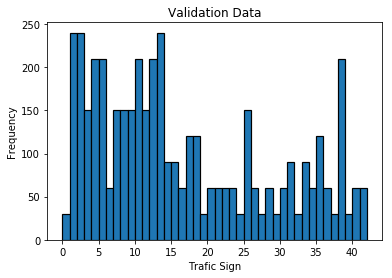

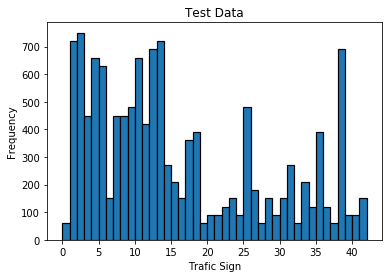

In [6]:
import numpy as np
%matplotlib inline

# Training Data 
plt.hist(y_train, 42,edgecolor='black', linewidth=1.2)
plt.xlabel("Trafic Sign")
plt.ylabel("Frequency")
plt.title("Training Data")
plt.xticks(np.arange(0,43, step=5))
plt.show()

# Validation Data
plt.hist(y_valid, 42,edgecolor='black', linewidth=1.2)
plt.xlabel("Trafic Sign")
plt.ylabel("Frequency")
plt.title("Validation Data")
plt.xticks(np.arange(0,43, step=5))
plt.show()

# Test Data 
plt.hist(y_test, 42,edgecolor='black', linewidth=1.2)
plt.xlabel("Trafic Sign")
plt.ylabel("Frequency")
plt.title("Test Data")
plt.xticks(np.arange(0,43, step=5))
plt.show()
           

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


- **Neural network architecture:** I tested two different archtectures, LeNet2 gave the best accuracy on this data set
- **Preprocessing techniques:** I tried several different techniques, the best results was when I only applied grayscale, shuffling and normalization. Some of the techniques I experimented with: 
    - Adding extra exmaples of the traffic signs with fewer occurences in the training set 
    - Augmenting the training set by adding random amout rotation, percpective transform and shear to the images 
    - Grayscale 
    - Normalization 
    - Shuffling


### 2.1 Pre-process the Data Set 

#### 2.1.1 Helper functions

In [7]:
import cv2
import numpy as np

def rotate_image(image, rotation_range=20): 
    # Rotation
    rotation_angle = np.random.randint(low=-rotation_range, high=rotation_range)
    center = tuple(np.array(image.shape[0:2])/2)
    M = cv2.getRotationMatrix2D(center,rotation_angle,1)
    return cv2.warpAffine(image, M, image.shape[0:2], flags=cv2.INTER_LINEAR)

def translation(image):
    # Translation 
    translation_x = translation_range*np.random.uniform()-translation_range/2
    translation_y = translation_range*np.random.uniform()-translation_range/2
    translation_matrix = np.float32([[1,0,translation_x],[0,1,translation_y]])
    return cv2.warpAffine(image, translation_matrix, (image.shape[0], image.shape[1]))

def shear(image, shear_range=10): 
    # Shear
    src = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    dst = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_matrix = cv2.getAffineTransform(src,dst)
    return cv2.warpAffine(image, shear_matrix, (image.shape[0], image.shape[1]))
    
    
def brightness(image): 
    r = .5+ np.random.uniform()
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] =  hsv[:, :, 2]*r
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def flip_image(image): 
    return cv2.flip(image,0)

def perspective_transform(image): 
    x_max = image.shape[1]
    y_max = image.shape[0]
    
    r_min = np.random.randint(low=1, high=5)
    r_max = np.random.randint(low=30, high=32)
    src = np.float32([(0,0),(x_max,0),(0,y_max),(x_max,y_max)])
    dst = np.float32([(0,0),(r_max,r_min),(r_min,y_max),(x_max,r_max)])
    M = cv2.getPerspectiveTransform(src, dst)
    
    return cv2.warpPerspective(image, M, (x_max, y_max))

def process_image(image):
    processed_img = rotate_image(image)
    processed_img = brightness(processed_img)
    processed_img = perspective_transform(processed_img)

    return processed_img

def aug_data(X, y): 
    # List of traffic sigs with few occurences in training set 
    rare_signs = [0,16,19,20,21,22,24,27,29,32,36,37]
    # List of traffic sigs with many occurences in training set 
    common_signs = [1,2,3,4,5,7,8,9,10,11,12,13,17,18,25,35,38]
    
    images = []
    labels = [] 

    # Add rotated versions to training sets if it is a rare traffic sign  
    for i, img in enumerate(X):
        label = y[i]
        if label in rare_signs: 
            for j in range(6):
                images.append(process_image(img))
                labels.append(label)
        if (label not in rare_signs) and  (label not in common_signs): 
            for j in range(2):
                images.append(process_image(img))
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    
    X = np.concatenate((X, images))
    y = np.concatenate((y, labels))

    
    return X,y         

def gray_scale(X):
    return np.sum(X/3, axis=3, keepdims=True)

def normalize(X): 
    return (X-128)/128

#### 2.1.2 Preprocess Pipeline 

In [8]:
from sklearn.utils import shuffle 

# ------------------------ Augment data ------------------------ #  
X_train_original = X_train
y_train_original = y_train
X_train_augmented, y_train_augmented = aug_data(X_train_original, y_train_original)

# ------------------------ Convert to gray scale images----------- #
X_train_gray = gray_scale(X_train)
X_valid_gray = gray_scale(X_valid)
X_test_gray = gray_scale(X_test)

# ------------------------ Normalize data ------------------------ # 
X_train_norm = normalize(X_train_gray)
X_valid = normalize(X_valid_gray)
X_test = normalize(X_test_gray)

# ------------------------ Shuffle data----------------------------# 
X_train, y_train = shuffle(X_train_norm, y_train)

# Update number of color channels 
n_color_channels = X_train[0].shape[-1]

#### 2.1.3 Visualizing Pre-processing

Original Image


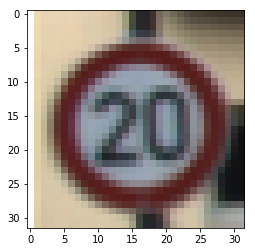

Rotated Image


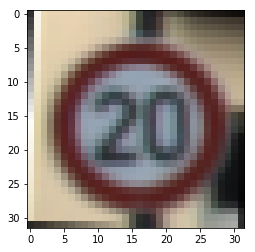

Perspective Transform


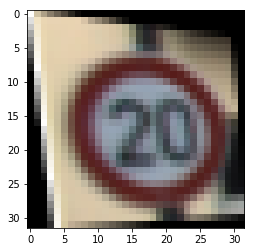

Brightness Transform


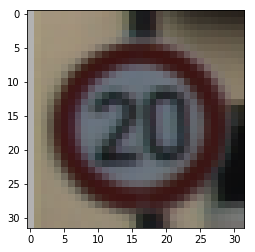

Flipped Image


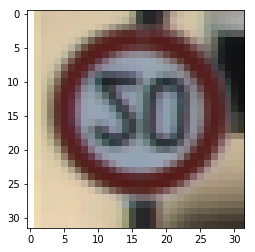

True

In [9]:
print('Original Image')
org_img = X_train_augmented[9960]
plt.imshow(org_img)
plt.show()
cv2.imwrite('./data-augmentation/org_img.png', org_img)

print('Rotated Image')
rot_img = rotate_image(org_img)
plt.imshow(rot_img)
plt.show()
cv2.imwrite('./data-augmentation/rot_img.png', rot_img)


print('Perspective Transform')
transf_img = perspective_transform(org_img)
plt.imshow(transf_img)
plt.show()
cv2.imwrite('./data-augmentation/transf_img.png', transf_img)

print('Brightness Transform')
bright_img = brightness(org_img)
plt.imshow(bright_img)
plt.show()
cv2.imwrite('./data-augmentation/bright_img.png', bright_img)

print('Flipped Image')
flip_img = flip_image(org_img)
plt.imshow(flip_img)
plt.show()
cv2.imwrite('./data-augmentation/flip_img.png', flip_img)


Number of training examples before augmentation:  34799


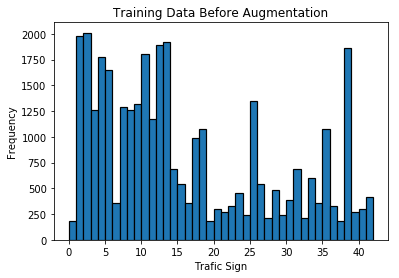

Number of training examples after augmentation:  65157


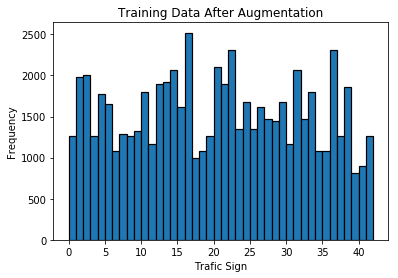

In [10]:
# Visualize Training data before augmentation
print("Number of training examples before augmentation: ", len(X_train_original))
hist1 = plt.hist(y_train_original, 42,edgecolor='black', linewidth=1.2)
plt.xlabel("Trafic Sign")
plt.ylabel("Frequency")
plt.title("Training Data Before Augmentation")
plt.xticks(np.arange(0,43, step=5))
plt.show()
plt.savefig("./data-augmentation/training-data-no-augmentation.png")

# Visualize Training data after augmentation
print("Number of training examples after augmentation: ", len(X_train_augmented))
hist2 = plt.hist(y_train_augmented, 42,edgecolor='black', linewidth=1.2)
plt.xlabel("Trafic Sign")
plt.ylabel("Frequency")
plt.title("Training Data After Augmentation")
plt.xticks(np.arange(0,43, step=5))
plt.show()
plt.savefig("./data-augmentation/training-data-augmentation.png")

### 2.2 Model Architecture

#### 2.2.1 Helper functions 

In [11]:
# Imports 
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def conv2D(x, W, b, k_size=5, k_stride=1, padding='VALID'): 
    return tf.nn.conv2d(x, W, strides=[1,k_stride,k_stride,1], padding=padding) + b
    

def relu(layer):
    return tf.nn.relu(layer)

def max_pool(layer, f_size=2, f_stride=2, padding='VALID'):
    return tf.nn.max_pool(layer, ksize=[1,f_size, f_size,1], strides=[1,f_stride,f_stride,1], padding=padding)


def dense(x, W,b, dropout): 
    layer = tf.add(tf.matmul(x, W), b)
    layer = tf.nn.relu(layer)
    return tf.nn.dropout(layer, dropout)

#### 2.2.2 LeNet architecture

This model is built based on the LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) 

In [12]:
def LeNet(x, mu=0, sigma=0.1, kernel_size=5, kernel_stride=1, filter_size=2, filter_stride=2, padding='VALID', dropout=1.0):    

        
    weights = {
        'conv1': tf.Variable(tf.truncated_normal(shape=(kernel_size, kernel_size, 1, 6), mean=mu, stddev=sigma)), 
        'conv2': tf.Variable(tf.truncated_normal(shape=(kernel_size, kernel_size, 6, 16), mean=mu, stddev=sigma)), 
        'fc1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma)), 
        'fc2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma)), 
        'out': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma)), 
    }
    
    biases = {
        'conv1': tf.Variable(tf.zeros(6)),
        'conv2': tf.Variable(tf.zeros(16)),
        'fc1': tf.Variable(tf.zeros(120)),
        'fc2': tf.Variable(tf.zeros(84)),
        'out': tf.Variable(tf.zeros(43))
    }
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = conv2D(x, weights['conv1'], biases['conv1'])
    conv1 = relu(conv1)
    conv1 = max_pool(conv1)

    # Layer 2: Convolutional. Output = 10x10x16.     
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = conv2D(conv1, weights['conv2'], biases['conv2'])
    conv1 = relu(conv2)
    conv1 = max_pool(conv2)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2) 
    
    # Layer 3: Fully Connected. Input = 576. Output = 120.
    fc1 = dense(fc0, weights['fc1'], biases['fc1'], dropout)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = dense(fc1, weights['fc2'], biases['fc2'], dropout)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])   
    
    return logits


#### 2.2.3 LeNet2 architecture 

This model is based on the implementation of Lenet from the article [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

In [13]:
def LeNet2(x, mu=0, sigma=0.1, kernel_size=5, kernel_stride=1, filter_size=2, filter_stride=2, padding='VALID', dropout=1.0):    
        
    weights = {
        'conv1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma)), 
        'conv2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma)), 
        'conv3': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean=mu, stddev=sigma)), 
        'out': tf.Variable(tf.truncated_normal(shape=(800, n_classes), mean=mu, stddev=sigma)), 
    }
    
    biases = {
        'conv1': tf.Variable(tf.zeros(6)),
        'conv2': tf.Variable(tf.zeros(16)),
        'conv3': tf.Variable(tf.zeros(400)),
        'out': tf.Variable(tf.zeros(43))
    }
    
    # Layer 1: 
    # Convolution: Input = 32x32x3. Output = 28x28x6.
    # Pooling: Input = 28x28x6. Output = 14x14x6.
    layer1 = conv2D(x, weights['conv1'], biases['conv1'])
    layer1 = relu(layer1)
    layer1 = max_pool(layer1)
    print("Layer 1 shape: ",layer1.get_shape())

    # Layer 2: 
    # Convolution: Input = 28x28x6. Output = 10x10x16.     
    # Pooling: Input = 10x10x16. Output = 5x5x16.
    layer2 = conv2D(layer1, weights['conv2'], biases['conv2'])
    layer2 = relu(layer2)
    layer2 = max_pool(layer2)
    print("Layer 2 shape: ",layer2.get_shape())

    # Layer 3: 
    # Convolution: Input = 5x5x16. Output = 1x1x400
    layer3 = conv2D(layer2, weights['conv3'], biases['conv3'])
    layer3 = relu(layer3)
    print("Layer 3 shape: ",layer3.get_shape())

    
    # Flatten. Input = 1x1x400. Output = 800.
    flatten1 = flatten(layer2) 
    flatten2 = flatten(layer3)
    flatten3 = tf.concat([flatten2, flatten1], 1)

    
    layer4 = tf.nn.dropout(flatten3, dropout)
    print("Layer 4 shape: ",layer4.get_shape())

    
    # Output: Fully Connected. Input = 800. Output = 0.
    logits = tf.add(tf.matmul(layer4, weights['out']), biases['out'])   
    
    return logits


### Train, Validate and Test the Model

#### Training pipeline

In [14]:
# Placeholder for a batch of input images 
x = tf.placeholder(tf.float32, (None, 32,32,n_color_channels))
# Placeholder for a batch of output labels 
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Parameters 
EPOCHS = 76 
BATCH_SIZE = 156 
learning_rate = 0.0009
dropout = 0.95
logits = LeNet2(x,dropout=dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

Layer 1 shape:  (?, 14, 14, 6)
Layer 2 shape:  (?, 5, 5, 16)
Layer 3 shape:  (?, 1, 1, 400)
Layer 4 shape:  (?, 800)


#### Model Evaluation 

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Training the model

In [16]:
training_results = []
validation_results = []
with tf.Session() as sess:
    with tf.device('/gpu:0'):
        sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(batch_x, batch_y)    
        validation_accuracy = evaluate(X_valid, y_valid)
        
        training_results.append(training_accuracy)
        validation_results.append(validation_accuracy)

        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.5f} - Validation Accuracy = {:.5f}".format(training_accuracy, validation_accuracy))
        print()
    test_accuracy = evaluate(X_test, y_test)
    save_path = saver.save(sess, './tmp/lenet2.ckpt')
    print("Model saved in path{}".format(save_path))


Training...

EPOCH 1 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.77914

EPOCH 2 ...
Training Accuracy = 0.72727 - Validation Accuracy = 0.84150

EPOCH 3 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.86372

EPOCH 4 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.88685

EPOCH 5 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.88163

EPOCH 6 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.90385

EPOCH 7 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.89660

EPOCH 8 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.91429

EPOCH 9 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.91066

EPOCH 10 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.92653

EPOCH 11 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.89728

EPOCH 12 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.91020

EPOCH 13 ...
Training Accuracy = 1.00000 - Validation Accuracy = 0.91655

EPOCH 14 ...
Training Accuracy = 1

### Validation Accuracy vs Training Accuracy 

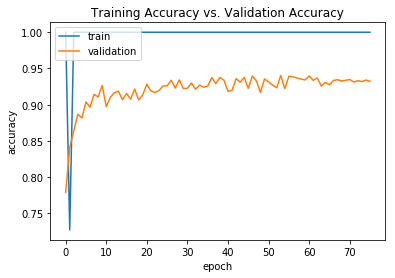

In [17]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(training_results)
ax.plot(validation_results)
plt.title('Training Accuracy vs. Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper left')
fig.savefig("./results/training_vs_validation.png")


### Test Accuracy 

In [18]:
print("The model's test accuracy: {}".format(test_accuracy))

The model's test accuracy: 0.9331750010084936




---

## Step 3: Test a Model on New Images

I download five pictures of German traffic signs from the web and use my model to predict the traffic sign type.

### Load and Output the Images

['img3.jpg', 'img7.jpg', 'img5.jpg', 'img4.jpg', 'img6.jpg', 'img1.jpg', 'img8.jpg', 'img2.jpg']


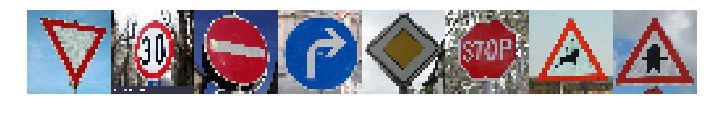

In [21]:
import os 

# Load and visualize test set 
test_images = os.listdir("test-data")
test_data = []
fig, ax = plt.subplots(1,8, figsize=(12, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
ax= ax.ravel()
for i, img_path in enumerate(test_images): 
    # Read image from file
    img = cv2.imread("./test-data/"+img_path)
    # Resize image to 32x32 
    img = cv2.resize(img, (32,32))
    
    # Show image 
    ax[i].axis('off')
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Add to test set
    test_data.append(img)
    

In [22]:
# Pre-process test data 
test_data = np.array(test_data)
test_data = gray_scale(test_data)
test_data = normalize(test_data)

# Label data 
test_labels = [12, 33, 13, 11, 14, 1, 31, 17]

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, I printed out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). 

In [23]:
softmax_logits = tf.nn.softmax(logits)
softmax_top_5 = tf.nn.top_k(softmax_logits, k=5)
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./tmp/lenet2.ckpt.meta')
    saver.restore(sess, "./tmp/lenet2.ckpt")
    logits = sess.run(softmax_logits, feed_dict={x: test_data})
    top_5 = sess.run(softmax_top_5, feed_dict={x: test_data})
    test_acc = evaluate(test_data, test_labels)
    print("Test Set Accuracy = {:.3f}".format(test_acc))
    labels_dict = {}
    predictions_dict = {}
    for i, image in enumerate(test_data):
        if top_5[1][i][0] == test_labels[i]:
            print("Image {}: Correctly classified".format(i+1))
        else: 
            print("Image {}: Wrongly classified".format(i+1))
        top_5_values = top_5[0][i]
        top_5_indices = top_5[1][i]
        
        traffic_signs = []
        predictions = []
        for j in range(5): 
            traffic_sign = df_signs.iloc[top_5_indices[j]]['SignName']
            confidence = top_5_values[j]*100
            print("\tGuess {}: {} with {:.2f}% confidence\n".format(j+1,traffic_sign, confidence))
            traffic_signs.append(traffic_sign)
            predictions.append(confidence)
        
        labels_dict[i] = traffic_signs
        predictions_dict[i] = predictions



INFO:tensorflow:Restoring parameters from ./tmp/lenet2.ckpt
Test Set Accuracy = 0.000
Image 1: Wrongly classified
	Guess 1: Yield with 100.00% confidence

	Guess 2: Priority road with 0.00% confidence

	Guess 3: Speed limit (50km/h) with 0.00% confidence

	Guess 4: Speed limit (20km/h) with 0.00% confidence

	Guess 5: Speed limit (30km/h) with 0.00% confidence

Image 2: Wrongly classified
	Guess 1: Speed limit (30km/h) with 100.00% confidence

	Guess 2: Right-of-way at the next intersection with 0.00% confidence

	Guess 3: Roundabout mandatory with 0.00% confidence

	Guess 4: Speed limit (20km/h) with 0.00% confidence

	Guess 5: General caution with 0.00% confidence

Image 3: Wrongly classified
	Guess 1: No entry with 100.00% confidence

	Guess 2: Turn left ahead with 0.00% confidence

	Guess 3: Stop with 0.00% confidence

	Guess 4: No passing for vehicles over 3.5 metric tons with 0.00% confidence

	Guess 5: No passing with 0.00% confidence

Image 4: Wrongly classified
	Guess 1: Turn 

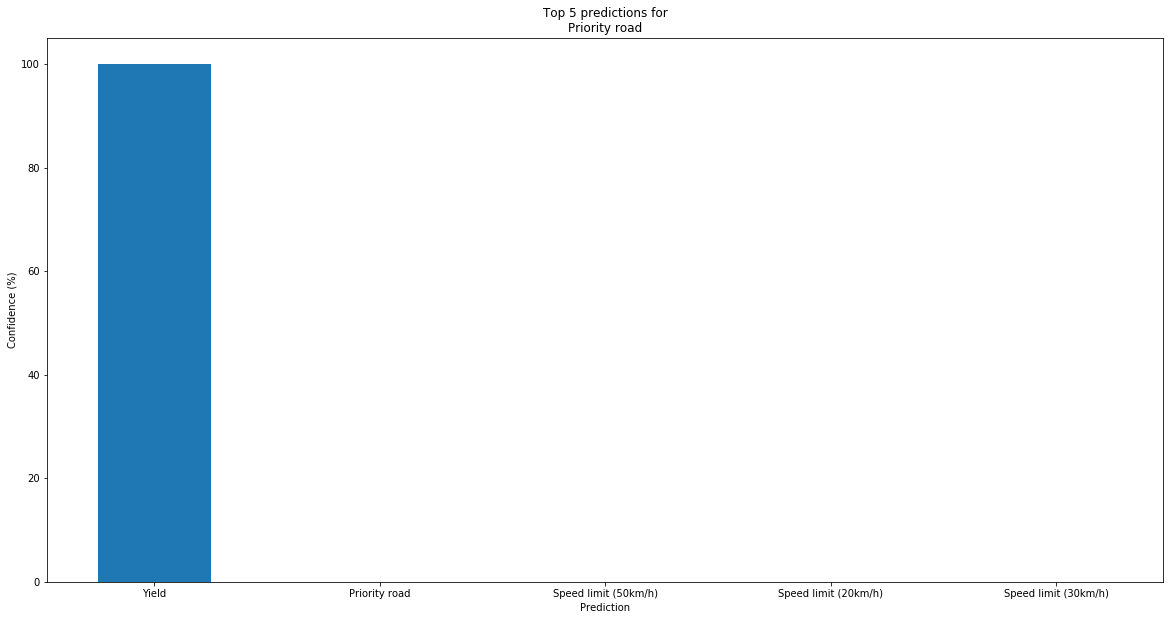

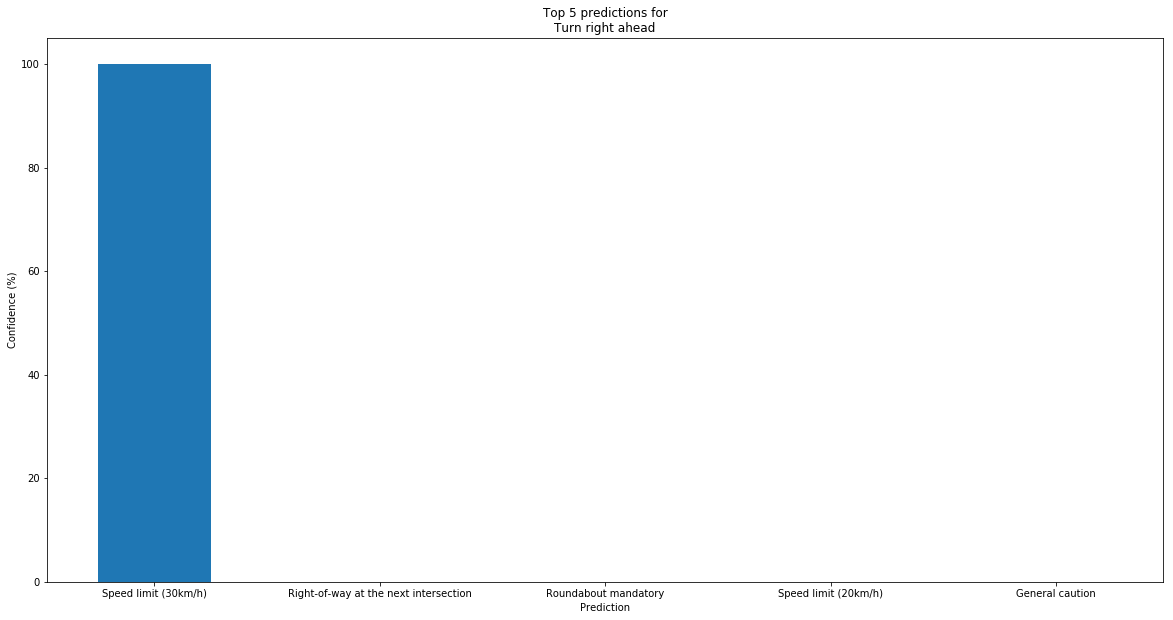

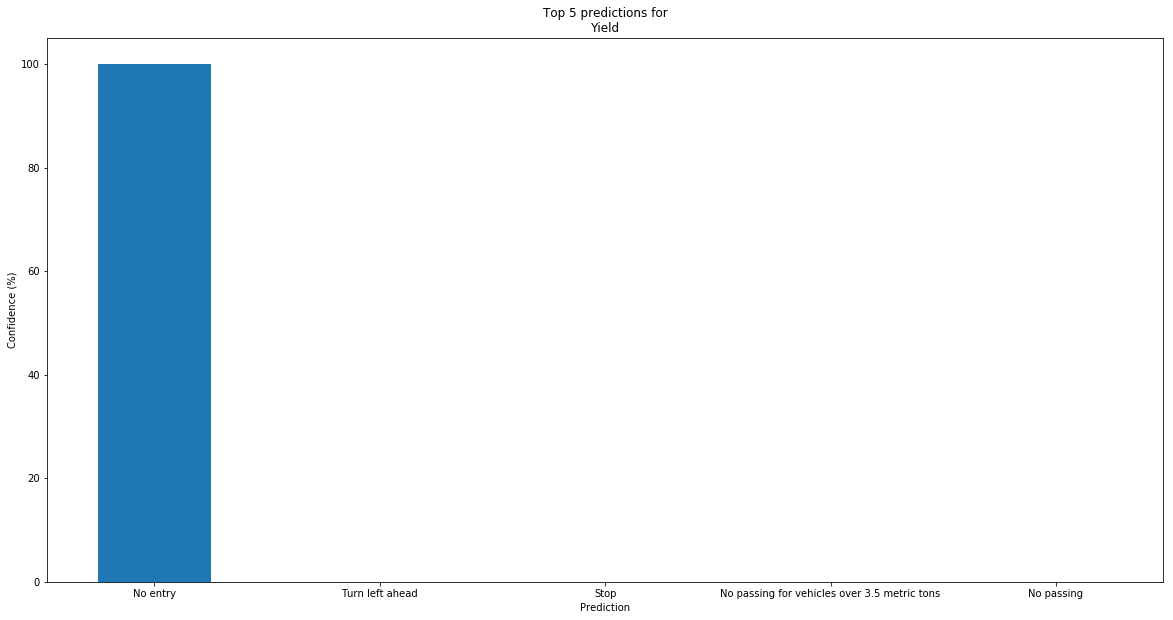

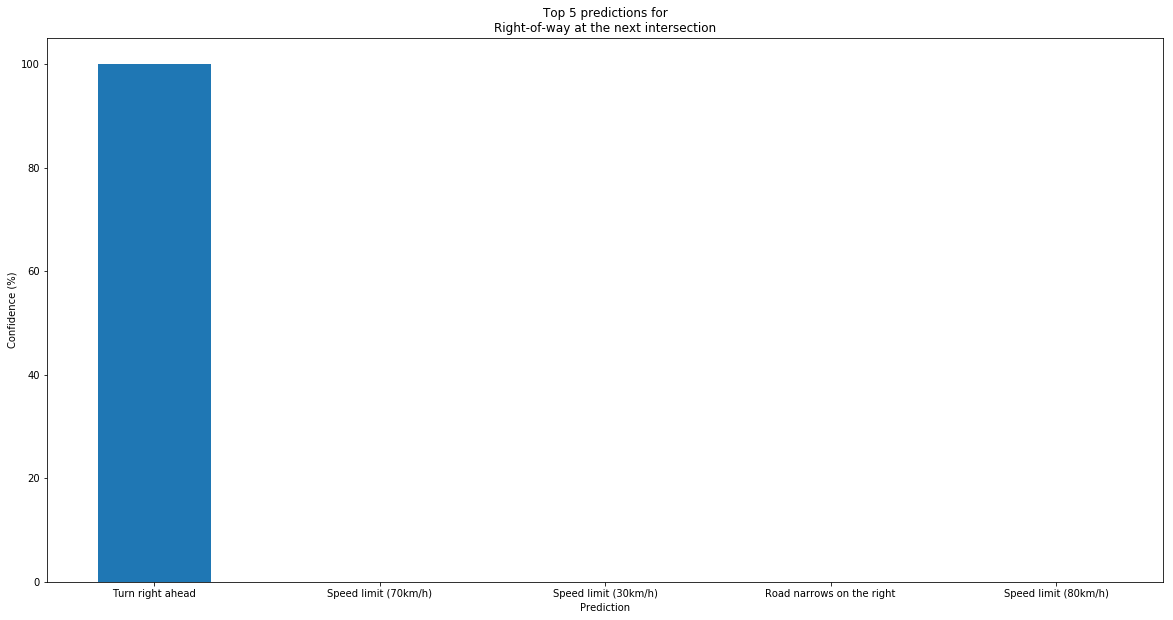

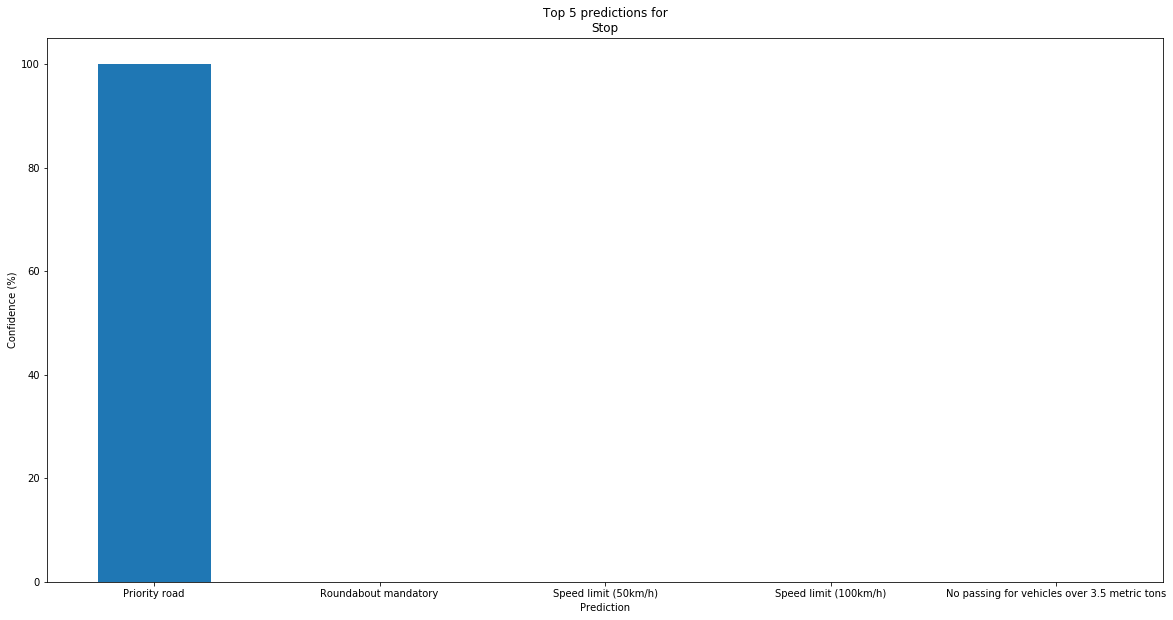

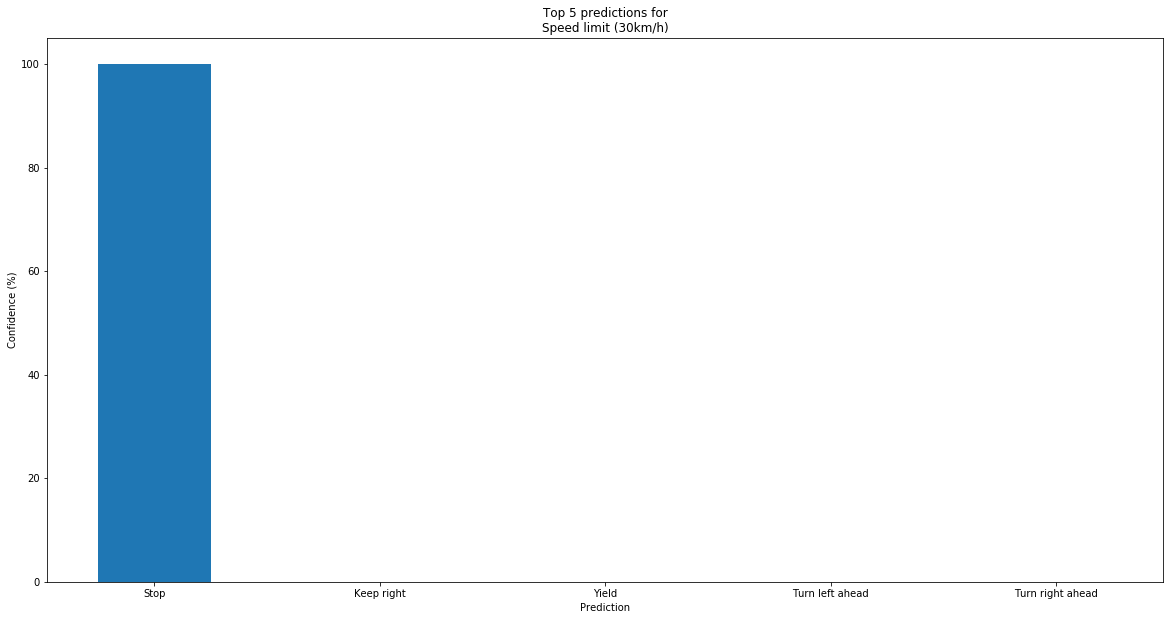

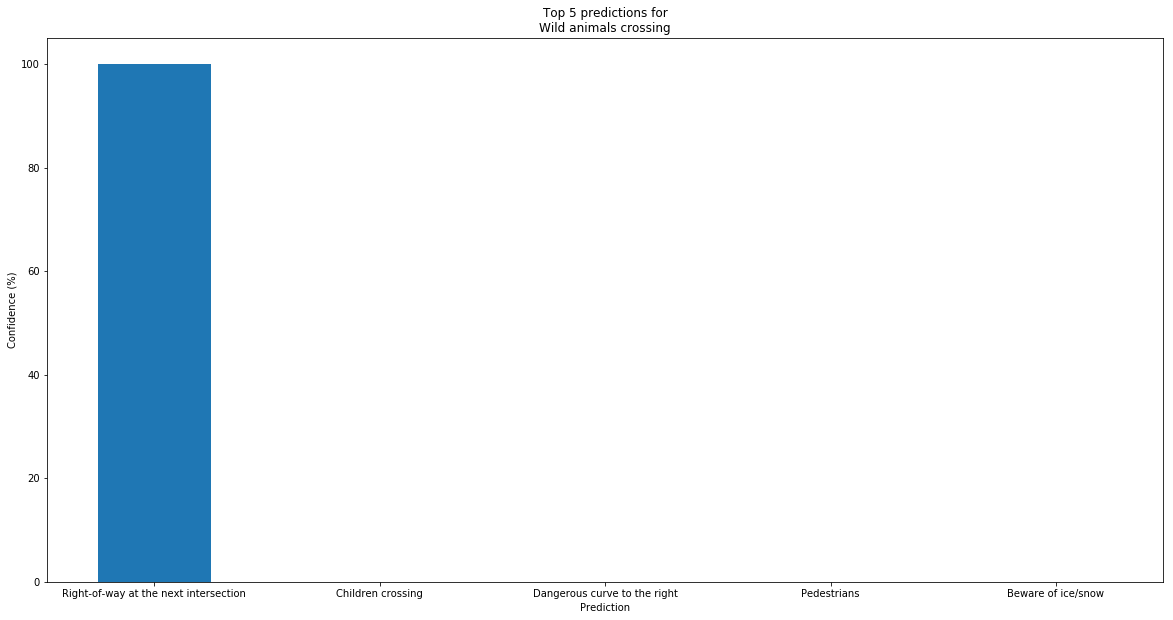

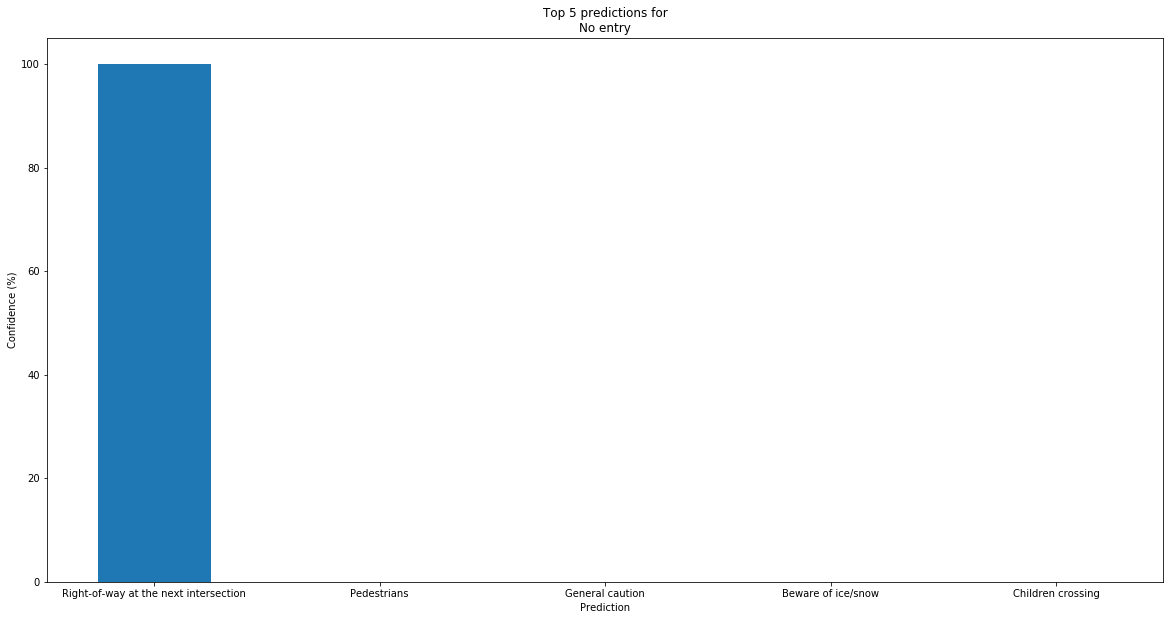

In [26]:
y_pos = np.arange(len(predictions_dict[0]))
for k, v in labels_dict.items(): 
    label = df_signs.iloc[test_labels[k]]['SignName']
    fig = plt.figure(figsize=(20, 10))
    plt.bar(y_pos, predictions_dict[k], 0.5)
    plt.xticks(y_pos, labels_dict[k])
    plt.ylabel('Confidence (%)')
    plt.xlabel('Prediction')
    plt.title('Top 5 predictions for\n{}'.format(label))
    plt.show()
    fig.savefig("./test-data-results/result{}.png".format(k+1))
    
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")